In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import plotly as px
import numpy as np
import missingno as msno # analyse des manquants 
import plotly.graph_objects as go #donut chart
import scipy.stats as scipy
from scipy.stats import pearsonr
from math import exp


In [4]:
#upload dataset exploratoire
df=pd.read_csv("/content/drive/MyDrive/Projet4_ConsoElec/dataset.csv")


In [5]:
dataset=df

In [6]:
dataset.head()

,OSEBuildingID,LargestPropertyUseType,LargestPropertyUseTypeGFA,Neighborhood,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),log_SiteEnergyUse(kBtu),log_GHGEmissions(MetricTonsCO2e),log_LargestPropertyUseTypeGFA,Year_slice,NbFloors_slice,Bin_SteamUse(kBtu),Bin_Electricity(kBtu),Bin_NaturalGas(kBtu),Bin_OtherFuelUse(kBtu)
0,43,Office,757027.0,GREATER DUWAMISH,8.0,448385312.0,0.0,150476283.0,297909000.0,NaN,NaN,19.921163,NaN,13.537154,1990-1999,20-30,0,1,1,0
1,364,Office,474546.0,NORTHEAST,77.0,28450436.0,0.0,28450433.0,0.0,NaN,NaN,17.163674,NaN,13.070114,1960-1969,30-40,0,1,0,0
2,365,Data Center,36000.0,NORTHEAST,96.0,30038490.0,0.0,30038487.0,0.0,NaN,NaN,17.217990,NaN,10.491274,1960-1969,30-40,0,1,0,0
3,750,Office,274362.0,DOWNTOWN,82.0,16540550.0,0.0,15836054.0,704494.0,NaN,NaN,16.621325,NaN,12.522204,1940-1949,30-40,0,1,1,0
4,20978,Manufacturing/Industrial Plant,45320.0,GREATER DUWAMISH,NaN,10234721.0,0.0,4233850.0,6000871.0,NaN,NaN,16.141297,NaN,10.721504,1970-1979,0-10,0,1,1,0


In [7]:
dataset.columns

Index(['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'Neighborhood', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)', 'Bin_Electricity(kBtu)', 'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)'],
      dtype='object')

In [8]:
dataset=dataset[['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice',
       'Bin_SteamUse(kBtu)',  'Bin_NaturalGas(kBtu)',
       'Bin_OtherFuelUse(kBtu)']]

In [9]:
datacor=dataset[['LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore', 
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'log_SiteEnergyUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)',
       'log_LargestPropertyUseTypeGFA', 'Year_slice', 'NbFloors_slice']]

## Corrélations des variables

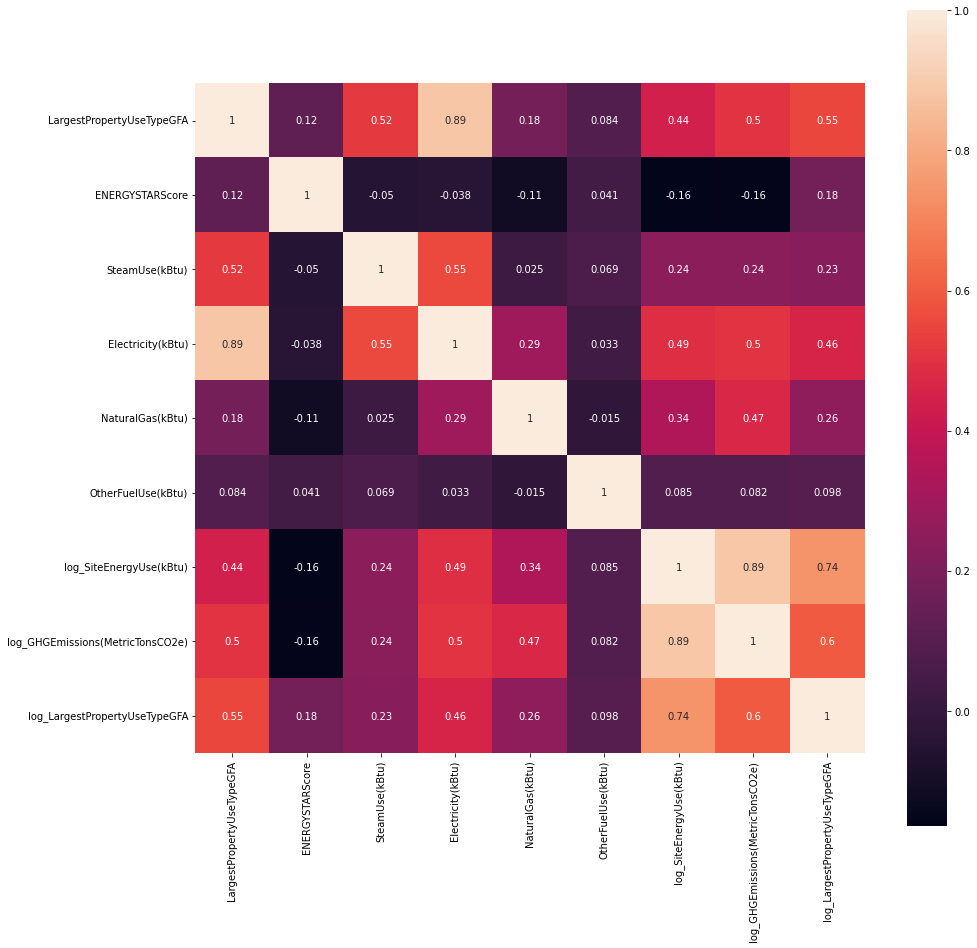

In [10]:
# Matrice des corrélations
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(datacor.corr(),annot = True, square=True)

In [11]:
dataset.dropna(0, inplace=True) # comme j'uilise ce dataset pour la régression je préfère droper les données manquantes plutôt que les approximer 

<ipython-input-11-11ead6c8d4be>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  dataset.dropna(0, inplace=True) # comme j'uilise ce dataset pour la régression je préfère droper les données manquantes plutôt que les approximer
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


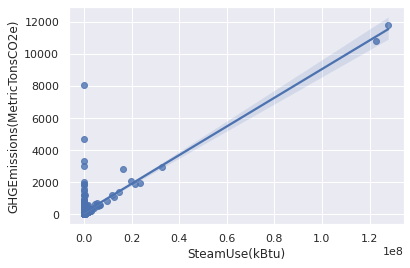

In [12]:
#Corrélation émissionsCO2/Energie
sns.set_theme(color_codes=True)

ax=sns.regplot(x='SteamUse(kBtu)', y='GHGEmissions(MetricTonsCO2e)', data=dataset)


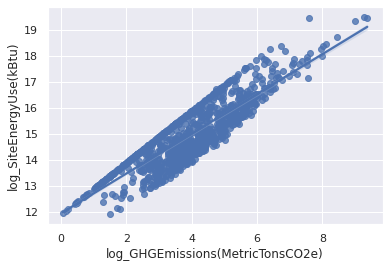

In [13]:
#Corrélation émissionsCO2/Energie
sns.set_theme(color_codes=True)

ax=sns.regplot(x="log_GHGEmissions(MetricTonsCO2e)", y='log_SiteEnergyUse(kBtu)', data=dataset)
#on va prédire les emissions à partir de l'énergie (r=0.89)

In [14]:
X=dataset["log_GHGEmissions(MetricTonsCO2e)"]
Y=dataset['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

0.8791710669406153


In [15]:
X=dataset['log_LargestPropertyUseTypeGFA']
Y=dataset['log_SiteEnergyUse(kBtu)']
corr, _ = pearsonr(X, Y)
print(corr)

0.7813118439717954


In [16]:
X=dataset['SiteEnergyUse(kBtu)']
Y=dataset["GHGEmissions(MetricTonsCO2e)"]
corr, _ = pearsonr(X, Y)
print(corr)

0.8829058524143988


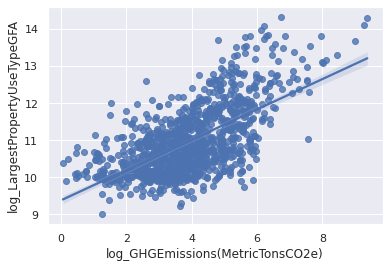

In [17]:
#Corrélation 

ax=sns.regplot(y='log_LargestPropertyUseTypeGFA', x="log_GHGEmissions(MetricTonsCO2e)", data=dataset)


In [18]:
X=dataset['log_LargestPropertyUseTypeGFA']
Y=dataset["log_GHGEmissions(MetricTonsCO2e)"]
corr, _ = pearsonr(X, Y)
print(corr)

0.6332743239068843


Interprétations : Les analyses statistiques et les corrélations me permettent d'établir une liste de variables importantes dans la modélisation des consommations d'énergie et prédictions des émissions de CO2. 


Les variables non numériques sont encodées pour la modélisation
Les énergies sont binarisées. Cela abolit l'importance de l'électricité dans le model énergie car plus de 99,7% des bâtiments utilisent l'électricité.
 
Modèle émissions de CO2:Les émissions de CO2 dépendent de l'énergie consommée. Ce sont les mêmes variables que pour le modèle de prédiction de l'énergie qui sont corrélées aux émissions de CO2. Ce sont juste les intensités de corrélation qui varient. 

Remarque: L'EnergyStarScore n'est corrélée à aucune variable comme le montrait la matrice des corrélations. On evaluera son importance dans le modèle de prédiction des émissions de CO2. 
L'intensité de la relation entre dépenses énergies ou les émissions de C02 avec la variable neighboord est faible (np2=0,012, np2=0,015). je ne conserve pas cette variable pour la modélisation car son encodage est complexe. 


# PARTIE 3 : Modélisation 

In [19]:
from sklearn import linear_model
import numpy as np
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# OLS (moindres carrés), Ridge
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import RandomizedSearchCV 

#non linear
from sklearn.ensemble import RandomForestRegressor

# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score



In [20]:
pip install shap # interprétation des variables dans le modèle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 18.4 MB/s eta 0:00:00


In [21]:
import shap

## Modélisation du CO2

J'ajoute l'EnergyStarScore dans mon modèle afin d'analyser sa contribution

Rappel: les variables corrélées aux émissions de CO2 sont l'énergie consommée (à prédire), l'utilisation du gaz naturel (variable binarisée),  le type de propriété et le nombre d'étages. 

### Target encoding de largestPropertyUse: target= log(Emissions de CO2)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 43 to 1609
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OSEBuildingID                     1058 non-null   int64  
 1   LargestPropertyUseType            1058 non-null   object 
 2   LargestPropertyUseTypeGFA         1058 non-null   float64
 3   ENERGYSTARScore                   1058 non-null   float64
 4   SiteEnergyUse(kBtu)               1058 non-null   float64
 5   SteamUse(kBtu)                    1058 non-null   float64
 6   Electricity(kBtu)                 1058 non-null   float64
 7   NaturalGas(kBtu)                  1058 non-null   float64
 8   OtherFuelUse(kBtu)                1058 non-null   float64
 9   GHGEmissions(MetricTonsCO2e)      1058 non-null   float64
 10  log_SiteEnergyUse(kBtu)           1058 non-null   float64
 11  log_GHGEmissions(MetricTonsCO2e)  1058 non-null   float64
 12  log_L

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
mean_data_=dataset[['LargestPropertyUseType', 'ENERGYSTARScore','log_LargestPropertyUseTypeGFA', 'NbFloors_slice', 'Year_slice',
        'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)']]

In [26]:
mean_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 43 to 1609
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LargestPropertyUseType            1058 non-null   object 
 1   ENERGYSTARScore                   1058 non-null   float64
 2   log_LargestPropertyUseTypeGFA     1058 non-null   float64
 3   NbFloors_slice                    1058 non-null   object 
 4   Year_slice                        1058 non-null   object 
 5   Bin_NaturalGas(kBtu)              1058 non-null   int64  
 6   Bin_SteamUse(kBtu)                1058 non-null   int64  
 7   log_GHGEmissions(MetricTonsCO2e)  1058 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 74.4+ KB


In [27]:
mean_data_['enc_NbFloors']=le.fit_transform(mean_data_['NbFloors_slice'])
mean_data_['enc_Year_slice']=le.fit_transform(mean_data_['Year_slice'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
mean_data_=mean_data_[['LargestPropertyUseType', 'ENERGYSTARScore',
       'log_LargestPropertyUseTypeGFA', 'enc_NbFloors', 'enc_Year_slice',
        'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)']]

Target mean encoding :

encodage par la moyenne de la cible : log_GHGEmissions

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mean_data_[['LargestPropertyUseType', 'ENERGYSTARScore', 'enc_NbFloors', 'enc_Year_slice',
        'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)', 'log_LargestPropertyUseTypeGFA', 'log_GHGEmissions(MetricTonsCO2e)']],
        mean_data_['log_GHGEmissions(MetricTonsCO2e)'], test_size=0.3, random_state=100)

In [30]:
#Now, we will calculate the target frequency of each LargestPropertyUseType' according to the 'log_GHGEmissions(MetricTonsCO2e)' value using groupby()
target_freq=X_train.groupby(['LargestPropertyUseType'])['log_GHGEmissions(MetricTonsCO2e)'].mean()
target_freq

LargestPropertyUseType
Bank Branch                              2.272262
Courthouse                               7.375306
Data Center                              7.597376
Distribution Center                      3.225651
Financial Office                         3.519389
Hospital (General Medical & Surgical)    7.155356
Hotel                                    5.325020
K-12 School                              4.199809
Manufacturing/Industrial Plant           4.006060
Medical Office                           4.541552
Multifamily Housing                      4.032013
Non-Refrigerated Warehouse               3.004250
Office                                   3.828541
Other                                    3.663562
Other - Public Services                  3.291010
Other - Restaurant/Bar                   5.595566
Parking                                  4.799983
Refrigerated Warehouse                   2.249215
Residence Hall/Dormitory                 3.423109
Retail Store               

In [31]:
#Converting to dictionnary
ordered_target_freq=target_freq.to_dict()
ordered_target_freq

# Les fréquences ont été calculées sur le train seulement et sont mappées sur le test 
X_train['Enc_LargestPropertyType']=X_train.LargestPropertyUseType.map(ordered_target_freq)
X_test['Enc_LargestPropertyType']=X_test.LargestPropertyUseType.map(ordered_target_freq)


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 382 to 1155
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LargestPropertyUseType            740 non-null    object 
 1   ENERGYSTARScore                   740 non-null    float64
 2   enc_NbFloors                      740 non-null    int64  
 3   enc_Year_slice                    740 non-null    int64  
 4   Bin_NaturalGas(kBtu)              740 non-null    int64  
 5   Bin_SteamUse(kBtu)                740 non-null    int64  
 6   log_LargestPropertyUseTypeGFA     740 non-null    float64
 7   log_GHGEmissions(MetricTonsCO2e)  740 non-null    float64
 8   Enc_LargestPropertyType           740 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 57.8+ KB


Text(0, 0.5, 'GHGEmissions(M.TonsCO2e)')

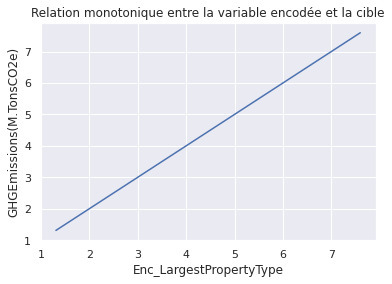

In [33]:
#Relation monotonique entre la variable et son encodage
fig=plt.figure()
fig=X_train.groupby(['Enc_LargestPropertyType'])['log_GHGEmissions(MetricTonsCO2e)'].mean().plot()
fig.set_title('Relation monotonique entre la variable encodée et la cible')
fig.set_ylabel('GHGEmissions(M.TonsCO2e)')

In [34]:
X_test

,LargestPropertyUseType,ENERGYSTARScore,enc_NbFloors,enc_Year_slice,Bin_NaturalGas(kBtu),Bin_SteamUse(kBtu),log_LargestPropertyUseTypeGFA,log_GHGEmissions(MetricTonsCO2e),Enc_LargestPropertyType
545,Non-Refrigerated Warehouse,11.0,1,3,1,0,11.021902,5.281527,3.004250
424,Office,86.0,3,3,1,0,12.346443,5.219436,3.828541
339,Office,76.0,3,9,0,0,11.567063,3.796388,3.828541
1340,Office,93.0,2,0,1,1,10.245018,3.601686,3.828541
318,Office,77.0,3,9,0,0,12.113162,4.420406,3.828541
...,...,...,...,...,...,...,...,...,...
1516,Office,69.0,2,4,1,0,10.367913,4.114474,3.828541
202,Hospital (General Medical & Surgical),30.0,3,10,1,1,14.115750,9.285507,7.155356
475,Office,85.0,2,0,0,0,11.560467,3.323956,3.828541
1123,Office,48.0,1,0,0,0,10.450163,3.489513,3.828541


In [35]:
# je drope les colonnes pour la régression :  Largestproperty qui est maintenant encodée 
X_test.drop(['LargestPropertyUseType'],axis=1, inplace=True)
X_train.drop(['LargestPropertyUseType'],axis=1, inplace=True)

In [36]:
datareg_=X_train[['ENERGYSTARScore',  'log_LargestPropertyUseTypeGFA', 'Enc_LargestPropertyType', 'enc_NbFloors', 'enc_Year_slice',
        'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)']]

In [37]:
X=datareg_[datareg_.columns[:-1]]
y=datareg_['log_GHGEmissions(MetricTonsCO2e)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [39]:
X_train

,ENERGYSTARScore,log_LargestPropertyUseTypeGFA,Enc_LargestPropertyType,enc_NbFloors,enc_Year_slice,Bin_NaturalGas(kBtu),Bin_SteamUse(kBtu)
239,88.0,11.989160,3.828541,3,6,0,1
126,86.0,10.847199,5.325020,2,10,1,0
171,93.0,12.815523,4.199809,1,11,1,0
967,72.0,11.337166,4.199809,0,0,1,0
356,51.0,11.758222,3.004250,3,1,1,0
...,...,...,...,...,...,...,...
1221,65.0,9.922555,3.239912,1,3,1,0
1540,62.0,11.541299,3.828541,3,8,0,0
580,52.0,11.315121,3.828541,3,1,0,1
1183,71.0,9.655603,3.828541,0,8,1,0


je ne standradise pas enregy star score car variable discrète (skew faible). Les autres sont transformées déjà par le log. 

## Modèles linéaires pour prédire les émissions de CO2

### Régression linéaire (baseline)

In [40]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

In [41]:
%timeit lr.fit(X_train, y_train)

1.94 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
# évaluation du modèle en CV sur le jeu d'entrainement :
MSE_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
r2_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='r2')

In [43]:
#Evaluation du modèle de régression linéaire (baseline)

# sur le jeu train en cross validation :
print ('MSE_lr(CV):', np.mean(MSE_lr_baseline*(-1)))
print ('r2_lr (CV):', np.mean(r2_lr_baseline))

MSE_lr(CV): 0.48763016521888797
r2_lr (CV): 0.7449371641340201


In [44]:
#j'applique le modèle 
y_pred_lr=lr.predict(X_test)

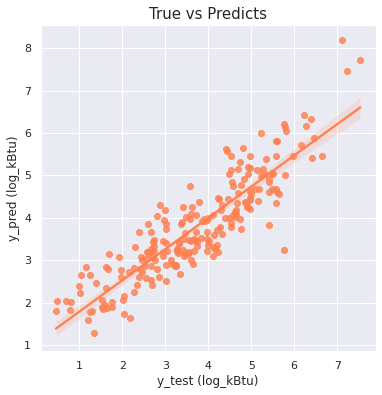

In [45]:
plt.figure(figsize = ( 6 , 6 )) 
  
sns.regplot(x=y_test, y=y_pred_lr, color='coral') #true vs predict
  
plt.xlabel( "y_test (log_kBtu)" , size = 12 ) 
  
plt.ylabel(  "y_pred (log_kBtu)"  , size = 12 ) 
  
plt.title( "True vs Predicts" , size = 15 ) 
  
plt.show() 


In [46]:
# regression intercept
print('Intercept:' ,lr.intercept_) 

#score de la régression sur le test
print('R2_test:', lr.score(X_test, y_test))
print ('MSE (lr, pred):', mean_squared_error (y_test, y_pred_lr))


Intercept: -7.0507119970793575
R2_test: 0.7837405371933405
MSE (lr, pred): 0.44857876671580865


In [47]:
df_coef_lr= pd.DataFrame(lr.coef_, index=X_train.columns)
df_coef_lr.columns=['lr Baseline']
df_coef_lr

,lr Baseline
ENERGYSTARScore,-0.012318
log_LargestPropertyUseTypeGFA,0.791356
Enc_LargestPropertyType,0.529972
enc_NbFloors,0.028371
enc_Year_slice,0.003784
Bin_NaturalGas(kBtu),1.247040
Bin_SteamUse(kBtu),1.101423


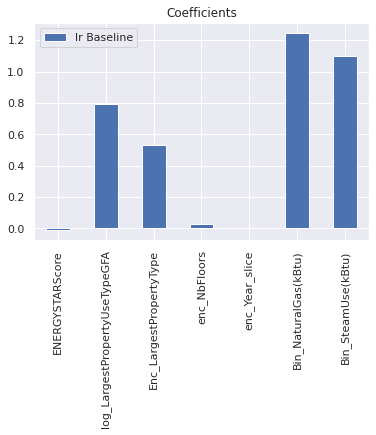

In [48]:
df_coef_lr.plot.bar(title='Coefficients')

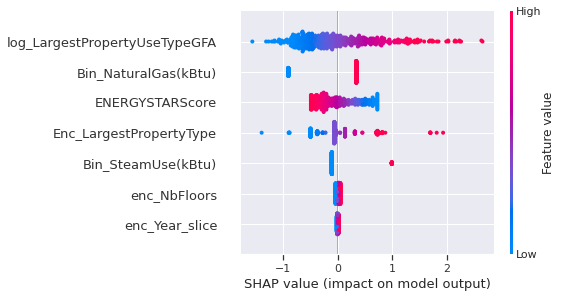

In [49]:
explainer = shap.LinearExplainer(lr, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [50]:
df_y_predLR= pd.DataFrame(y_pred_lr)

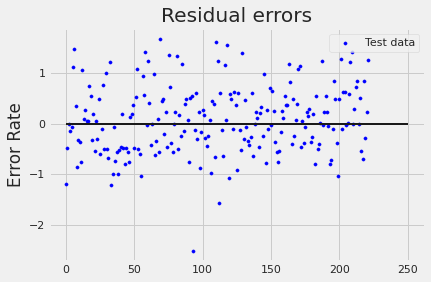

In [51]:
df_y_predLR= pd.DataFrame(y_pred_lr)

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 

## plotting residual errors in test data
plt.scatter(x=df_y_predLR.index, y=lr.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
#plt.scatter((X_train).index, lr.predict(X_train) - y_train,
           # color = "coral", s = 10, label = 'Train data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.ylabel('Error Rate')
plt.title("Residual errors")

 
## function to show plot
plt.show()


### Regression Ridge CV

In [52]:
n_alphas = 200
alphas=np.logspace(-3, 3, n_alphas) 

#Entraînement du modèle 
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
squared_r = []
errors_MSE = []


for a in alphas:
    ridge.set_params(alpha=a) 
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    score_MSE_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score_r2_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='r2')
    squared_r.append([np.mean(r2_lr_baseline), np.mean(score_r2_R)])
    errors_MSE.append([np.mean(MSE_lr_baseline*(-1)), -np.mean(score_MSE_R)])
  

In [53]:
errors_MSE

[[0.48763016521888797, 0.487630140151284],
 [0.48763016521888797, 0.4876301383628758],
 [0.48763016521888797, 0.48763013644794234],
 [0.48763016521888797, 0.4876301343976926],
 [0.48763016521888797, 0.4876301322027475],
 [0.48763016521888797, 0.48763012985310805],
 [0.48763016521888797, 0.48763012733811345],
 [0.48763016521888797, 0.4876301246464093],
 [0.48763016521888797, 0.4876301217658999],
 [0.48763016521888797, 0.48763011868371303],
 [0.48763016521888797, 0.4876301153861554],
 [0.48763016521888797, 0.4876301118586673],
 [0.48763016521888797, 0.4876301080857835],
 [0.48763016521888797, 0.4876301040510816],
 [0.48763016521888797, 0.48763009973714216],
 [0.48763016521888797, 0.4876300951255022],
 [0.48763016521888797, 0.4876300901966106],
 [0.48763016521888797, 0.4876300849297876],
 [0.48763016521888797, 0.48763007930318264],
 [0.48763016521888797, 0.48763007329373753],
 [0.48763016521888797, 0.4876300668771563],
 [0.48763016521888797, 0.48763006002787374],
 [0.48763016521888797, 0.

In [54]:
# Fonction qui recherche l'erreur minimale et donne son index
def min_alpha(errors):
  index=0
  min_val=10
  for i, error in enumerate (errors): #fonction qui à chaque boucle écrase min val et index
    if error[1]<min_val:
      min_val=error[1]
      index=i
  return index #on stocke l'index de l'erreur minimale et à chaque fois qu'on trouve une erreur plus petite on remplace l'index et le min val de maniere à mettre à jour la valeur la plus petite. 
 

In [55]:
min(errors_MSE)

[0.48763016521888797, 0.48762926785632876]

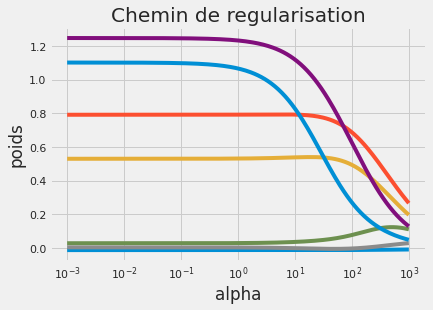

In [56]:
#Chemin de régularisation 
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title( 'Chemin de regularisation')
plt.axis('tight')
plt.show()

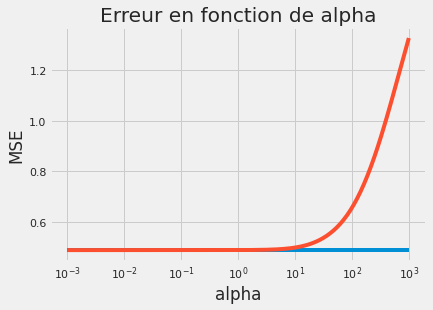

In [57]:
# Evolution de MSE en fonction de alpha (Train)
ax = plt.gca()

ax.plot(alphas, errors_MSE)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title( 'Erreur en fonction de alpha')
plt.axis('tight')
plt.show()

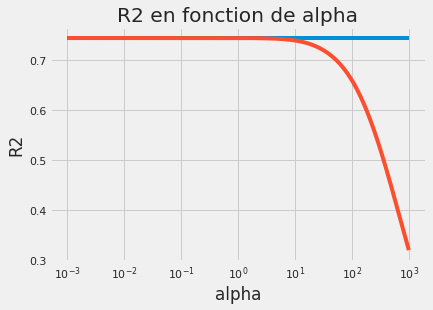

In [58]:
# Evolution de R2 en fonction du coeff alpha 
ax = plt.gca()

ax.plot(alphas, squared_r)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 en fonction de alpha")
plt.axis('tight')
plt.show()

In [59]:
index=min_alpha(errors_MSE)
index

61

In [60]:
alphas[index]

0.06905513520162328

In [61]:
coefs[index]

array([-0.01231803,  0.7914065 ,  0.53006423,  0.02843636,  0.00373813,
        1.24601609,  1.09890696])

In [62]:
errors_MSE[index]

[0.48763016521888797, 0.48762926785632876]

In [63]:
squared_r[index]

[0.7449371641340201, 0.7449386857209567]

In [64]:
#J'applique le meilleur alpha sur la regression Ridge: 
ridge_b = linear_model.Ridge(alpha=alphas[index])
%timeit ridge_b.fit(X_train, y_train)

1.21 ms ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [65]:
ridge_b.score(X_train, y_train)

0.7672925886808697

In [66]:
y_pred_r=ridge_b.predict(X_test)

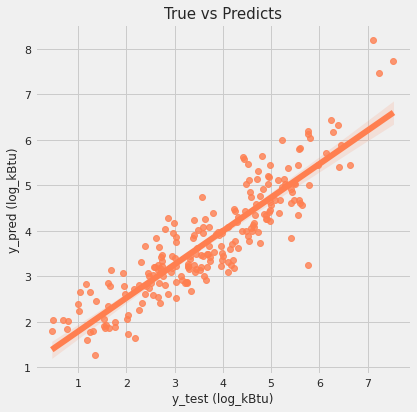

In [67]:
plt.figure(figsize = ( 6 , 6 )) 
  
sns.regplot(x=y_test, y=y_pred_r, color='coral') #true vs predict
  
plt.xlabel( "y_test (log_kBtu)" , size = 12 ) 
  
plt.ylabel(  "y_pred (log_kBtu)"  , size = 12 ) 
  
plt.title( "True vs Predicts" , size = 15 ) 
  
plt.show() 


In [68]:
# regression intercept
print('Intercept:' ,ridge_b.intercept_) 

#score de la régression sur le test
print('R2_test:', ridge_b.score(X_test, y_test))
print ('MSE (lr, pred):', mean_squared_error (y_test, y_pred_r))

Intercept: -7.050537986342555
R2_test: 0.7837070860735358
MSE (lr, pred): 0.44864815309951867


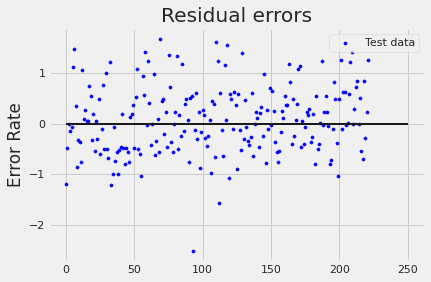

In [69]:
df_y_pred_r= pd.DataFrame(y_pred_r)

# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 

## plotting residual errors in test data
plt.scatter(x=df_y_pred_r.index, y=ridge_b.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
#plt.scatter((X_train).index, lr.predict(X_train) - y_train,
           # color = "coral", s = 10, label = 'Train data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.ylabel('Error Rate')
plt.title("Residual errors")

 
## function to show plot
plt.show()

In [70]:
df_coef_R= pd.DataFrame(ridge_b.coef_, index=X_train.columns)
df_coef_R.columns=['Ridge']
df_coef_R

,Ridge
ENERGYSTARScore,-0.012318
log_LargestPropertyUseTypeGFA,0.791407
Enc_LargestPropertyType,0.530064
enc_NbFloors,0.028436
enc_Year_slice,0.003738
Bin_NaturalGas(kBtu),1.246016
Bin_SteamUse(kBtu),1.098907


In [71]:
df_coef_R.index

Index(['ENERGYSTARScore', 'log_LargestPropertyUseTypeGFA',
       'Enc_LargestPropertyType', 'enc_NbFloors', 'enc_Year_slice',
       'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)'],
      dtype='object')

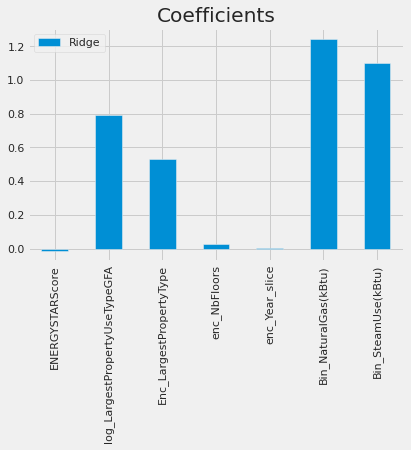

In [72]:
df_coef_R.plot.bar(title='Coefficients')

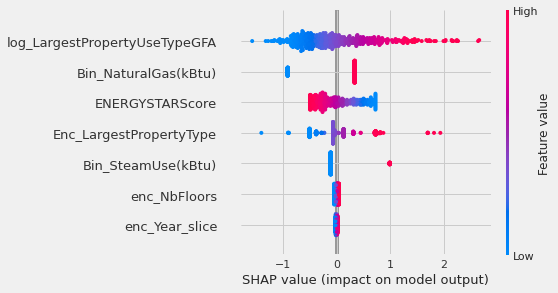

In [73]:
explainer = shap.LinearExplainer(ridge_b, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

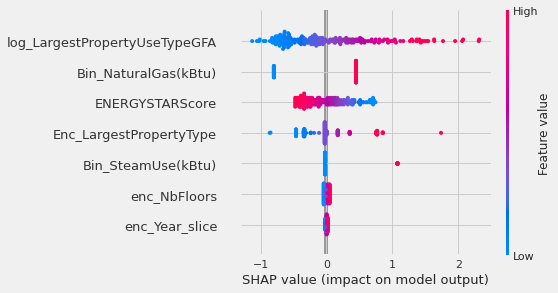

In [74]:
explainer = shap.LinearExplainer(ridge_b, X_test)
shap_values = explainer.shap_values(X_test)
f = plt.figure()
shap.summary_plot(shap_values, X_test)

In [75]:
#Evaluation de la régression Ridge:
# sur le jeu train en cross validation :
print ('MSE_BaselineCV vs RidgeCV:', errors_MSE[index])
print ('r2__BaselineCV vs RidgeCV:', squared_r[index])

#Evaluation du modèle sur le test :
print ('R2_test:', r2_score (y_test, y_pred_r))
print ('MSE_test:', mean_squared_error (y_test, y_pred_r))


MSE_BaselineCV vs RidgeCV: [0.48763016521888797, 0.48762926785632876]
r2__BaselineCV vs RidgeCV: [0.7449371641340201, 0.7449386857209567]
R2_test: 0.7837070860735358
MSE_test: 0.44864815309951867


Regression Ridge avec alpha optimal en CV permet de diminuer la MSE et le modèle est régularisé. C'est le meilleur modèle linéaire. Le lasso régularise très peu et la MSE ne diminue pas. 

### Lasso

In [76]:
#Entraînement du lasso sur le jeu d'entraînement 
n_alphas = 200
a = np.logspace(-3, 3, n_alphas)
lasso = linear_model.Lasso()

coefs_l = []
errors_l = []
squared_r_l=[]

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train) 
    coefs_l.append(lasso.coef_)
    score_MSE_l =cross_val_score (lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score_r2_l=cross_val_score (lasso, X_train, y_train, cv=5, scoring='r2')
    squared_r_l.append([np.mean(r2_lr_baseline), np.mean(score_r2_l)])
    errors_l.append([np.mean(MSE_lr_baseline*(-1)), -np.mean(score_MSE_l)])
    

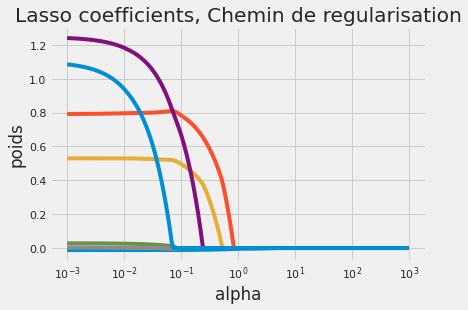

In [77]:
#Chemin de régularisation (lasso)
ax = plt.gca()

ax.plot(alphas, coefs_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Lasso coefficients, Chemin de regularisation')
plt.axis('tight')
plt.show()

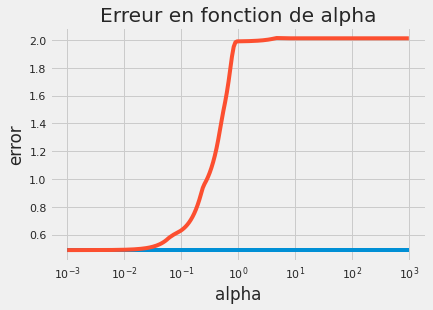

In [78]:

ax = plt.gca()

ax.plot(alphas, errors_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('Erreur en fonction de alpha')
plt.show()

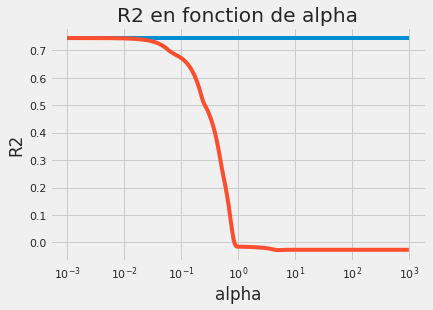

In [79]:
ax = plt.gca()

ax.plot(alphas, squared_r_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 en fonction de alpha")
plt.axis('tight')
plt.show()

In [80]:
min(errors_l)

[0.48763016521888797, 0.48766139664339114]

In [81]:
#alpha optimal 
index=min_alpha(errors_l)


In [82]:
index

0

In [83]:
errors_l[index] 

[0.48763016521888797, 0.48766139664339114]

In [84]:
alphas[index]

0.001

In [85]:
#j'applique le meilleur alpha sur le modèle lasso:

lasso = linear_model.Lasso(alpha=alphas[index])
%timeit lasso.fit(X_train, y_train)


1.27 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [86]:
y_pred_l=lasso.predict(X_test)

In [87]:
coefs_l[index]

array([-0.01231376,  0.79186618,  0.52997266,  0.02809741,  0.00344659,
        1.24063676,  1.08527472])

In [88]:
lasso.coef_

array([-0.01231376,  0.79186618,  0.52997266,  0.02809741,  0.00344659,
        1.24063676,  1.08527472])

In [89]:
df_coef_l= pd.DataFrame(lasso.coef_, index=X_train.columns) 
df_coef_l.columns=['Lasso']
df_coef_l

,Lasso
ENERGYSTARScore,-0.012314
log_LargestPropertyUseTypeGFA,0.791866
Enc_LargestPropertyType,0.529973
enc_NbFloors,0.028097
enc_Year_slice,0.003447
Bin_NaturalGas(kBtu),1.240637
Bin_SteamUse(kBtu),1.085275


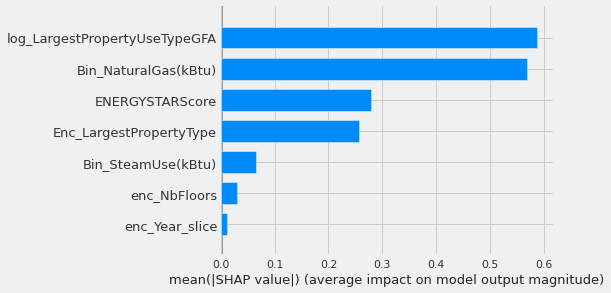

In [90]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

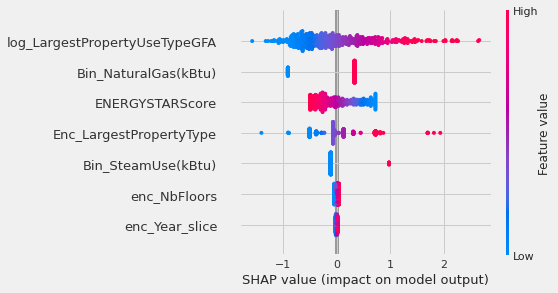

In [91]:
explainer = shap.LinearExplainer(lasso, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [92]:
#Evaluation du modèle LassoS:
# sur le jeu train en cross validation :
print ('MSE_baselineCV vs LassoCV:',errors_l[index] )
print ('r2_baselineCV vs LassoCV:', squared_r_l[index])

#Evaluation du modèle sur le test :
print ('r2 (test):', r2_score (y_test, y_pred_l))
print ('MSE (test):', mean_squared_error (y_test, y_pred_l))

MSE_baselineCV vs LassoCV: [0.48763016521888797, 0.48766139664339114]
r2_baselineCV vs LassoCV: [0.7449371641340201, 0.7449108653016768]
r2 (test): 0.7834993629484919
MSE (test): 0.4490790252659489


### Conclusion des modèles linéaires
La régularisation Ridge permet de légèrement corriger le modèle. C'est le meilleur modèle linéaire. La MSE test est meilleure que la MSE train et l'erreur est stable au fur et à mesure des prédictions.

 L'EnergyStar score a un coefficient très faible dans les modèles linéaires.  Les coefficients les plus forts sont l'utilisation de la vapeur d'eau et du gaz puis la surface des bâtiments.
L'analyse par shap values montre que l'Energy Star score a une contribution modérée dans le modèle, après la surface et l'utilisation du gaz. 

Je vais tester un modèle non linéaire pour voir si il est plus adapté.

##Random Forest Regressor (RandomizedSearchCV)

In [93]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)] # je test 10 estimateurs entre 200 et 1000
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)] #nb étages dans l'arbre 
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10] #nb échantillons par feuille et créer un noeud 
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] #nb min d'échantillon par feuille : permet de limiter la profondeur de l'arbre et donc l'overfitting 
# Method of selecting samples for training each tree
bootstrap = [True, False] # randomnisation et aggrégation des résultats : permet d'éviter l'overfitting

In [94]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
              

In [95]:
# Utilisation de la random_grid pour trouver les meilleurs paramètres du modèles
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=30, n_jobs = -1, scoring=['neg_mean_squared_error','r2'], refit='neg_mean_squared_error') #refit: cherhce à optimiser la mse # par défaut le score est le R2 mais comme le modèle n'est pa slinéaire il faut changer 
# Fit the random search model
rf_random.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=30, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error', 'r2'], verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 45,
 'bootstrap': True}

In [97]:
n_estimators = rf_random.best_params_['n_estimators']
min_samples_split=  rf_random.best_params_['min_samples_split']
min_samples_leaf=rf_random.best_params_['min_samples_leaf']
max_features=rf_random.best_params_['max_features']
max_depth =rf_random.best_params_['max_depth']
bootstrap =rf_random.best_params_['bootstrap']

In [98]:
# Applications des best params du randomizedSearchCV

rf_best = RandomForestRegressor(n_estimators = n_estimators,
min_samples_split=min_samples_split ,
min_samples_leaf=min_samples_leaf,
max_features=max_features,
max_depth =max_depth,
bootstrap =bootstrap)

# Fit the random search model
%timeit rf_best.fit(X_train, y_train)

747 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
# Evaluation de la RF: MSE 
#c'est la neg mse en validation croisée 
# 5 fold, 5 scores par random forest et celle qui a le meilleur score 
rf_random.best_score_
MSE_RF_best=(rf_random.best_score_)*(-1)

In [100]:
MSE_RF_best

0.5241403693699898

In [101]:
df_Features_importance_RF_Best= pd.DataFrame(rf_best.feature_importances_, index=X_train.columns)
df_Features_importance_RF_Best.columns=['Random Forest (best)']
df_Features_importance_RF_Best

,Random Forest (best)
ENERGYSTARScore,0.105586
log_LargestPropertyUseTypeGFA,0.452490
Enc_LargestPropertyType,0.182464
enc_NbFloors,0.021811
enc_Year_slice,0.032093
Bin_NaturalGas(kBtu),0.186181
Bin_SteamUse(kBtu),0.019375


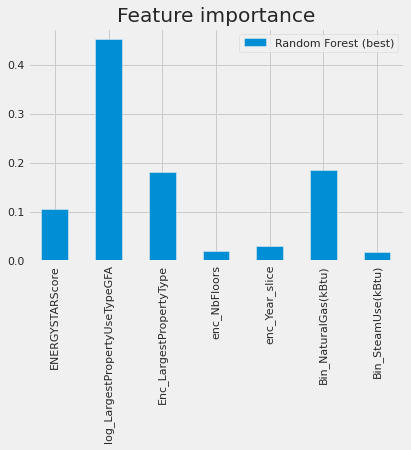

In [102]:
df_Features_importance_RF_Best.plot.bar(title='Feature importance')

 98%|===================| 507/518 [00:27<00:00]       

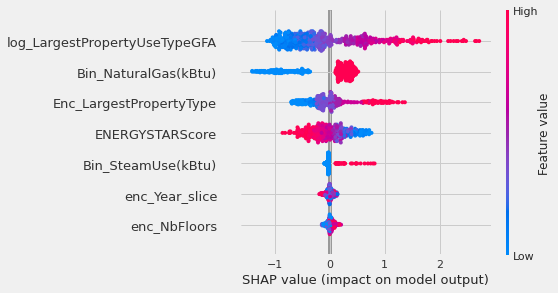

In [103]:
explainer = shap.TreeExplainer(rf_best, X_train)
shap_values = explainer.shap_values(X_train)
f = plt.figure()
shap.summary_plot(shap_values, X_train)

 98%|===================| 218/222 [00:12<00:00]       

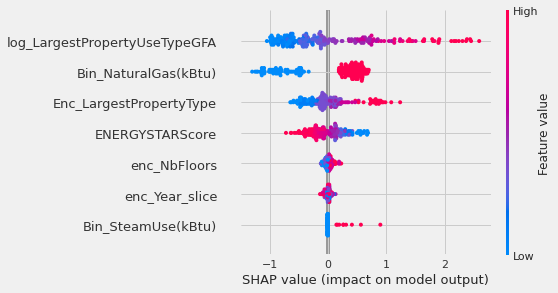

In [104]:
explainer = shap.TreeExplainer(rf_best, X_test)
shap_values = explainer.shap_values(X_test)
f = plt.figure()
shap.summary_plot(shap_values, X_test)

La RF n'apporte pas une meilleure erreur et le temps d'entrainement est plus long. Le % de contribution de l'EnergyStar score dans le modèle RF est plus important et légèrement plus modéré dans l'analyse shap. 
Je ne choisis pas ce modèle.

## Choix du modèle : RidgeCV

In [105]:
from math import exp

In [106]:
#Evaluation de la régression Ridge:
# sur le jeu train en cross validation :
print ('MSE_BaselineCV vs RidgeCV:', errors_MSE[index])
print ('r2__BaselineCV vs RidgeCV:', squared_r[index])
print('MSE RF_Best:', MSE_RF_best)

#Evaluation du modèle sur le test :
print ('R2_test Ridge:', r2_score (y_test, y_pred_r))
print ('MSE_test Ridge:', mean_squared_error (y_test, y_pred_r))

# Repasser les MSE en KbTu

print("MSE(Metric/tons/C02) Ridge:", exp(0.487630140151284))
print("MSE(Metric/tons/C02) lr_baseline:", exp(0.487630165218888))

MSE_BaselineCV vs RidgeCV: [0.48763016521888797, 0.487630140151284]
r2__BaselineCV vs RidgeCV: [0.7449371641340201, 0.7449371923144626]
MSE RF_Best: 0.5241403693699898
R2_test Ridge: 0.7837070860735358
MSE_test Ridge: 0.44864815309951867
MSE(Metric/tons/C02) Ridge: 1.6284524394028217
MSE(Metric/tons/C02) lr_baseline: 1.628452480224223


In [107]:
Features_results_CO2= pd.concat([df_coef_lr,df_coef_R, df_coef_l,df_Features_importance_RF_Best], axis=1)
Features_results_CO2

,lr Baseline,Ridge,Lasso,Random Forest (best)
ENERGYSTARScore,-0.012318,-0.012318,-0.012314,0.105586
log_LargestPropertyUseTypeGFA,0.791356,0.791407,0.791866,0.452490
Enc_LargestPropertyType,0.529972,0.530064,0.529973,0.182464
enc_NbFloors,0.028371,0.028436,0.028097,0.021811
enc_Year_slice,0.003784,0.003738,0.003447,0.032093
Bin_NaturalGas(kBtu),1.247040,1.246016,1.240637,0.186181
Bin_SteamUse(kBtu),1.101423,1.098907,1.085275,0.019375


Conclusion : Le meilleur modèle est la régression linéaire régularisée par Ridge. 


## Select From Model sur Ridge
Importance des variables dans le meilleur modèle 

In [108]:
#SElect From Model: voir importance des variables en particulier l'EnergyStarscore 
from sklearn.feature_selection import SelectFromModel

In [109]:
selector = SelectFromModel(estimator=ridge_b).fit(X_train, y_train) # threshold=mean(coef)

In [110]:
selector.threshold_


0.5301266141445538

In [111]:
selector.get_support()

array([False,  True, False, False, False,  True,  True])

In [112]:
X_train_Select= selector.transform(X_train)

In [113]:
# Pour récupérer les variables selectionnées ou non (array True ou Flase)
list_columns=X_train.columns
new_columns=[]
for i, columns in enumerate (list_columns):
  if selector.get_support()[i]== True :
    new_columns.append(columns)

In [114]:
new_columns

['log_LargestPropertyUseTypeGFA', 'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)']

In [115]:
df_X_train_Select = pd.DataFrame(X_train_Select, columns=new_columns)

In [116]:
df_X_train_Select

,log_LargestPropertyUseTypeGFA,Bin_NaturalGas(kBtu),Bin_SteamUse(kBtu)
0,11.989160,0.0,1.0
1,10.847199,1.0,0.0
2,12.815523,1.0,0.0
3,11.337166,1.0,0.0
4,11.758222,1.0,0.0
...,...,...,...
513,9.922555,1.0,0.0
514,11.541299,0.0,0.0
515,11.315121,0.0,1.0
516,9.655603,1.0,0.0


## Conclusions

L'erreur la plus faible est dans le modèle linéaire Ridge(CV). L'erreur ramenée en MetricTonsCO2 n'est pas négligeable.
Je choisis la régularisation Ridge, modèle régularisé, plus stable que le lasso, meilleure MSE.
La surface, le type de bâtiments et l'utilisation du gaz naturel sont les variables qui ont le plus d'importance dans modèle choisi pour prédire le CO2.
L'EnergyStarScore est de poids modéré dans le modèle (interprétation shap values), son poids est inférieur au poids moyen des variables, c'est pourquoi elle n'est pas retenue par le SElectFromModel.
Le temps d'entrainement de Ridge (alpha optimal), une fois les meilleurs paramètres obtenus, est comparable au modèle linéaire et bien inférieur à la RF.

Testes supplémentaires : Ridge sans EnergySatrScore

In [117]:
datareg_=datareg_[['log_LargestPropertyUseTypeGFA', 'Enc_LargestPropertyType', 'enc_NbFloors', 'enc_Year_slice',
        'Bin_NaturalGas(kBtu)', 'Bin_SteamUse(kBtu)', 'log_GHGEmissions(MetricTonsCO2e)']]

In [118]:
X=datareg_[datareg_.columns[:-1]]
y=datareg_['log_GHGEmissions(MetricTonsCO2e)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [119]:
lr = linear_model.LinearRegression()

In [120]:
%timeit lr.fit(X_train, y_train)

1.3 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [121]:
# évaluation du modèle en CV sur le jeu d'entrainement :
MSE_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 
r2_lr_baseline= cross_val_score (lr, X_train, y_train, cv=5, scoring='r2')

In [122]:
MSE_lr_baseline

array([-0.67223156, -0.68020997, -0.51412176, -0.59947262, -0.62475228])

In [123]:
r2_lr_baseline

array([0.6824033 , 0.72812804, 0.72539841, 0.66350152, 0.58895714])

In [124]:
n_alphas = 200
alphas=np.logspace(-3, 3, n_alphas) 

#Entraînement du modèle 
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
squared_r = []
errors_MSE = []


for a in alphas:
    ridge.set_params(alpha=a) 
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    score_MSE_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score_r2_R=cross_val_score (ridge, X_train, y_train, cv=5, scoring='r2')
    squared_r.append([np.mean(r2_lr_baseline), np.mean(score_r2_R)])
    errors_MSE.append([np.mean(MSE_lr_baseline*(-1)), -np.mean(score_MSE_R)])
  

In [125]:
min(errors_MSE)

[0.6181576376148277, 0.6181460938794842]